In [1]:
"""
QUESTION 1
"""
print("----------- QUESTION 1 -----------")
# -*- coding: utf-8 -*-
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import matplotlib.pyplot as plt

# load data
categories = ['comp.graphics', 'comp.os.ms-windows.misc', 
              'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 
              'rec.autos', 'rec.motorcycles', 
              'rec.sport.baseball', 'rec.sport.hockey']
dataset = fetch_20newsgroups(subset='all', categories=categories, 
                             shuffle=True, random_state=42)

# define stop_words and vectorizer
stop_words = text.ENGLISH_STOP_WORDS
vectorizer = text.CountVectorizer(min_df=3, stop_words=stop_words)

# get the TF matrix
X_counts = vectorizer.fit_transform(dataset.data)
X_counts.toarray()

# TF-IDF matrix
X_tfidf = text.TfidfTransformer().fit_transform(X_counts)
print ("The dimension of the TF-IDF matrix is ",X_tfidf.shape)

----------- QUESTION 1 -----------
The dimension of the TF-IDF matrix is  (7882, 27768)


In [2]:
# Plot the contingency table
def plot_contingency_table(cm, classes, normalize=False, title='Contingency Table', cmap=plt.cm.Blues):
    """
    This function prints and plots the contingency table.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized contingency table")
    else:
        print('contingency table')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

----------- QUESTION 2 -----------
the contingency table is 
 [[   4 3899]
 [1718 2261]]
contingency table
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1500,
    n_clusters=2, n_init=50, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)


TypeError: Image data cannot be converted to float

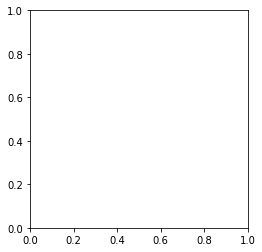

In [3]:
"""
QUESTION 2
"""
print("----------- QUESTION 2 -----------")

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# assign labels to data
num_data = len(dataset.target)
y = [0 if dataset.target[i] < 4 else 1 for i in range(num_data)]

# train a KMeans classifier
kmeans_clf = KMeans(n_clusters=2, n_init=50, max_iter=1500, random_state=0)

# use k-means to predict the label for each data
y_pred = kmeans_clf.fit_predict(X_tfidf)

# report contingency table
print("the contingency table is \n",confusion_matrix(y,y_pred))

# plot the contingency table
classes = ["class1","class2"]
plt.figure()
plot_contingency_table(kmeans_clf, classes, normalize=False, title='Contingency Table')
plt.show()

In [52]:
"""
QUESTION 3
"""
print("----------- QUESTION 3 -----------")

# evaluate clustering scores
print("Homogeneity: ",metrics.homogeneity_score(y,y_pred))
print("Completeness: ",metrics.completeness_score(y,y_pred))
print("V-measure: ",metrics.v_measure_score(y,y_pred))
print("adjusted Rand Index: ",metrics.adjusted_rand_score(y,y_pred))
print("adjusted mutual information score: ",metrics.adjusted_mutual_info_score(y,y_pred))

----------- QUESTION 3 -----------
Homogeneity:  0.24849088234048644
Completeness:  0.3309536095243892
V-measure:  0.28385446957932986
adjusted Rand Index:  0.1747688509498478
adjusted mutual information score:  0.2484220730528498


----------- QUESTION 4 -----------


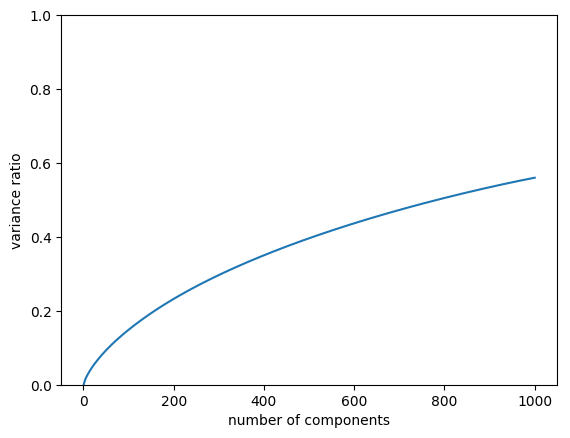

In [53]:
"""
QUESTION 4
"""
print("----------- QUESTION 4 -----------")

from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

svd = TruncatedSVD(n_components=1000,random_state=42)
train_svd = svd.fit_transform(X_tfidf)
y = np.zeros(1000) #ratio of variance retained for i components, 0<=i<=1000
x = np.arange(1,1001) # i
temp = 0

for i in range(1000):
    temp += svd.explained_variance_ratio_[i]
    y[i] = temp
    
plt.figure()
plt.plot(x,y)
plt.ylim(0,1)
plt.ylabel('variance ratio')
plt.xlabel('number of components')
plt.show()

----------- QUESTION 5 -----------
Homogeneity: [0.00029 0.59595 0.38973 0.22135 0.23463 0.23640 0.23694 0.24591 0.24849]
Completeness: [0.00030 0.59687 0.43152 0.30970 0.32122 0.32256 0.32296 0.32972 0.33095]
V-measure:  [0.00029 0.59641 0.40956 0.25817 0.27118 0.27284 0.27334 0.28172 0.28385]
adjusted Rand Index:  [0.00033 0.69815 0.37606 0.14477 0.15780 0.15982 0.16043 0.17076 0.17477]
adjusted mutual information score: [0.00020 0.59591 0.38968 0.22127 0.23455 0.23633 0.23687 0.24584 0.24842]


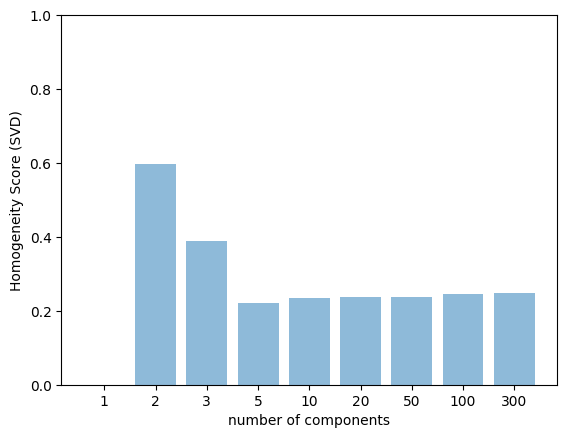

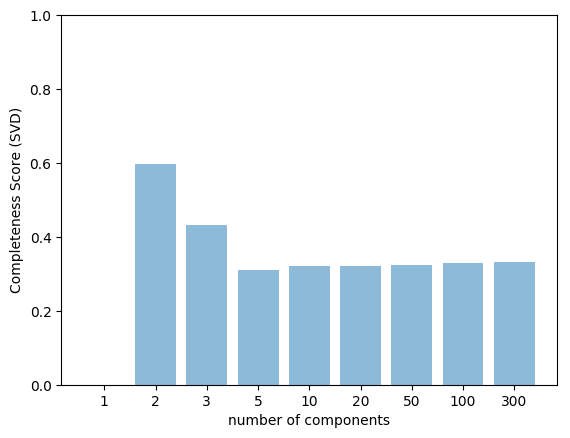

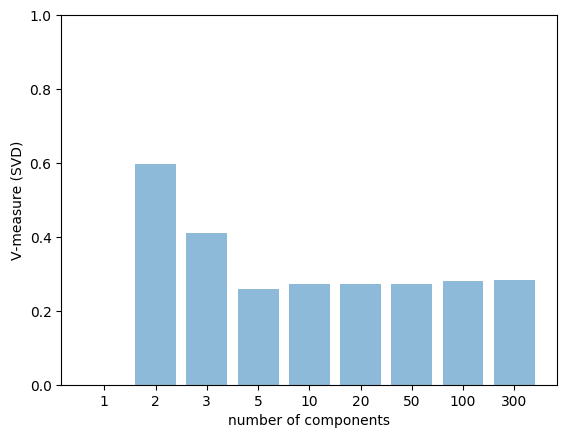

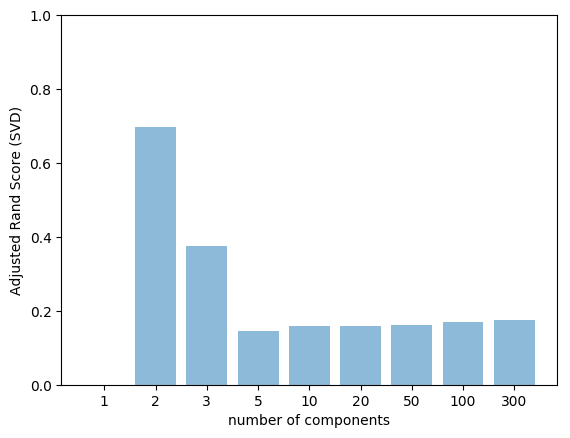

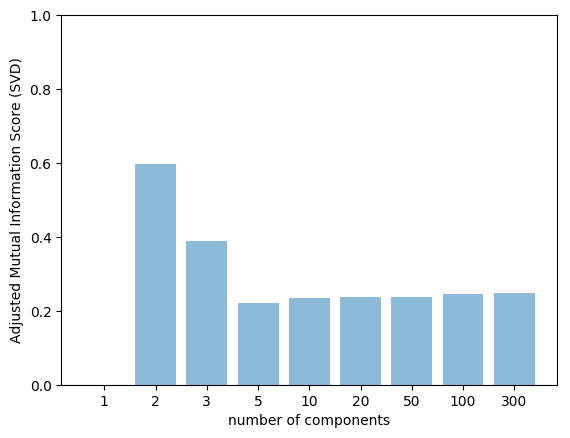

In [54]:
"""
QUESTION 5
"""
print("----------- QUESTION 5 -----------")

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt

# assign labels to data
num_data = len(dataset.target)
y = [0 if dataset.target[i] < 4 else 1 for i in range(num_data)]

# initialization
r = [1,2,3,5,10,20,50,100,300]
x = np.arange(1,10)

h_svd = np.zeros(len(r))
c_svd = np.zeros(len(r))
v_svd = np.zeros(len(r))
ar_svd = np.zeros(len(r))
am_svd = np.zeros(len(r))

km = KMeans(n_clusters=2,max_iter=100,n_init=5,random_state=42)

for i in range(len(r)):
    # SVD
    svd = TruncatedSVD(n_components=r[i],random_state=42)
    train_svd = svd.fit_transform(X_tfidf)
    y_pred_svd = km.fit_predict(train_svd)
    # SVD scores
    h_svd[i] = metrics.homogeneity_score(y, y_pred_svd)
    c_svd[i] = metrics.completeness_score(y, y_pred_svd)
    v_svd[i] = metrics.v_measure_score(y, y_pred_svd)
    ar_svd[i] = metrics.adjusted_rand_score(y, y_pred_svd)
    am_svd[i] = metrics.adjusted_mutual_info_score(y, y_pred_svd)
    
# SVD Results
np.set_printoptions(formatter={'float': lambda x: "{0:0.5f}".format(x)})  # set all print out values to 5 decimals
print("Homogeneity:", h_svd)
print("Completeness:", c_svd)
print("V-measure: ", v_svd)
print("adjusted Rand Index: ", ar_svd)
print("adjusted mutual information score:", am_svd)

x = np.arange(1,10)
n = ['1','2','3','5','10','20','50','100','300']
plt.figure()
plt.bar(x, h_svd, align='center', alpha=0.5)
plt.xticks(x,n)
plt.ylim(0,1)
plt.ylabel('Homogeneity Score (SVD)')
plt.xlabel('number of components')
plt.show()

plt.figure()
plt.bar(x, c_svd, align='center', alpha=0.5)
plt.xticks(x,n)
plt.ylim(0,1)
plt.ylabel('Completeness Score (SVD)')
plt.xlabel('number of components')
plt.show()

plt.figure()
plt.bar(x, v_svd, align='center', alpha=0.5)
plt.xticks(x,n)
plt.ylim(0,1)
plt.ylabel('V-measure (SVD)')
plt.xlabel('number of components')
plt.show()

plt.figure()
plt.bar(x, ar_svd, align='center', alpha=0.5)
plt.xticks(x,n)
plt.ylim(0,1)
plt.ylabel('Adjusted Rand Score (SVD)')
plt.xlabel('number of components')
plt.show()

plt.figure()
plt.bar(x, am_svd, align='center', alpha=0.5)
plt.xticks(x,n)
plt.ylim(0,1)
plt.ylabel('Adjusted Mutual Information Score (SVD)')
plt.xlabel('number of components')
plt.show()


Homogeneity: [0.00029 0.67905 0.22934 0.18063 0.18999 0.20937 0.00375 0.00346 0.01469]
Completeness: [0.00030 0.68013 0.31648 0.27871 0.28670 0.30139 0.05441 0.07678 0.13560]
V-measure:  [0.00029 0.67959 0.26596 0.21920 0.22853 0.24709 0.00702 0.00662 0.02651]
adjusted Rand Index:  [0.00033 0.77702 0.15280 0.10196 0.11056 0.13083 -0.00009 -0.00009 0.00137]
adjusted mutual information score: [0.00020 0.67902 0.22927 0.18056 0.18991 0.20930 0.00366 0.00336 0.01460]


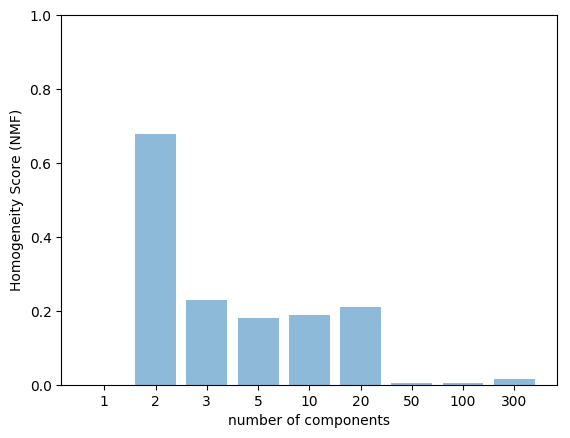

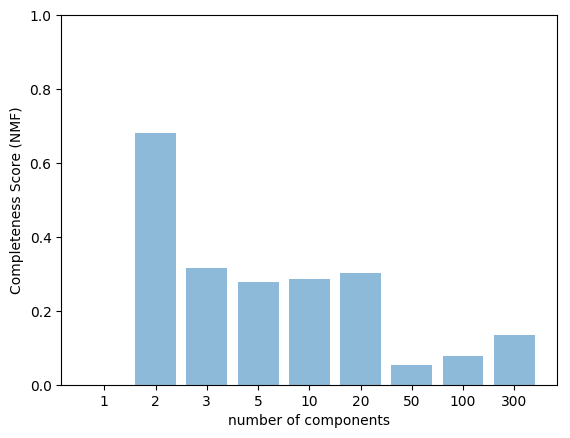

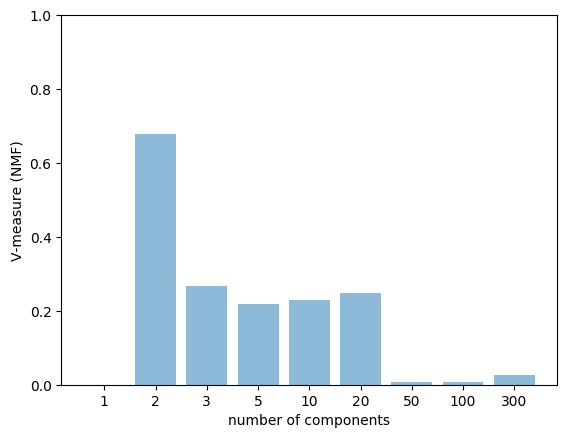

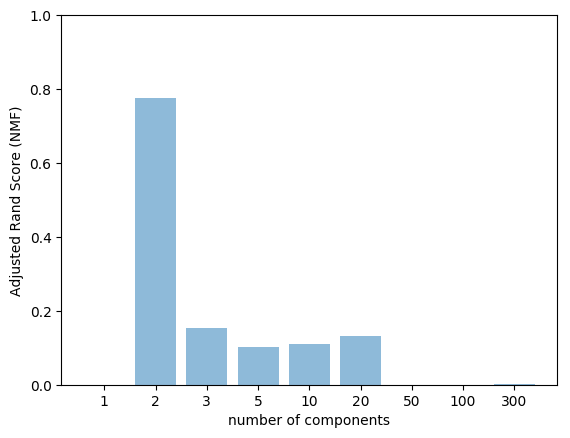

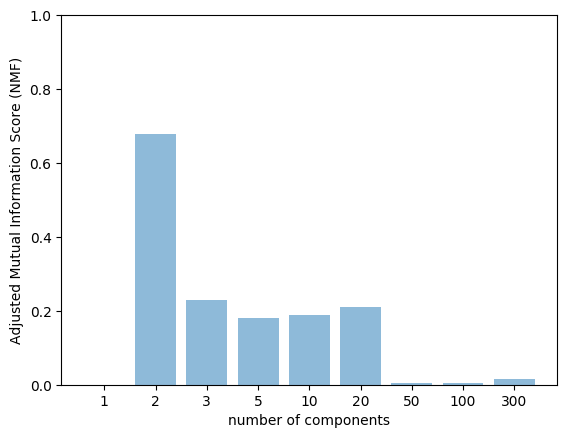

In [55]:
h_nmf = np.zeros(len(r))
c_nmf = np.zeros(len(r))
v_nmf = np.zeros(len(r))
ar_nmf = np.zeros(len(r))
am_nmf = np.zeros(len(r))

for i in range(len(r)):
    # NMF
    nmf = NMF(n_components=r[i],random_state=42)
    train_nmf = nmf.fit_transform(X_tfidf)
    y_pred_nmf = km.fit_predict(train_nmf)
    # NMF scores
    h_nmf[i] = metrics.homogeneity_score(y, y_pred_nmf)
    c_nmf[i] = metrics.completeness_score(y, y_pred_nmf)
    v_nmf[i] = metrics.v_measure_score(y, y_pred_nmf)
    ar_nmf[i] = metrics.adjusted_rand_score(y, y_pred_nmf)
    am_nmf[i] = metrics.adjusted_mutual_info_score(y, y_pred_nmf)
    
# NMF results
print("Homogeneity:", h_nmf)
print("Completeness:", c_nmf)
print("V-measure: ", v_nmf)
print("adjusted Rand Index: ", ar_nmf)
print("adjusted mutual information score:", am_nmf)

x = np.arange(1,10)
n = ['1','2','3','5','10','20','50','100','300']

plt.figure()
plt.bar(x, h_nmf, align='center', alpha=0.5)
plt.xticks(x,n)
plt.ylim(0,1)
plt.ylabel('Homogeneity Score (NMF)')
plt.xlabel('number of components')
plt.show()

plt.figure()
plt.bar(x, c_nmf, align='center', alpha=0.5)
plt.xticks(x,n)
plt.ylim(0,1)
plt.ylabel('Completeness Score (NMF)')
plt.xlabel('number of components')
plt.show()

plt.figure()
plt.bar(x, v_nmf, align='center', alpha=0.5)
plt.xticks(x,n)
plt.ylim(0,1)
plt.ylabel('V-measure (NMF)')
plt.xlabel('number of components')
plt.show()

plt.figure()
plt.bar(x, ar_nmf, align='center', alpha=0.5)
plt.xticks(x,n)
plt.ylim(0,1)
plt.ylabel('Adjusted Rand Score (NMF)')
plt.xlabel('number of components')
plt.show()

plt.figure()
plt.bar(x, am_nmf, align='center', alpha=0.5)
plt.xticks(x,n)
plt.ylim(0,1)
plt.ylabel('Adjusted Mutual Information Score (NMF)')
plt.xlabel('number of components')
plt.show()


----------- QUESTION 6 -----------

When r < 2: Underfitting, not enough features to train; When r > 2: Overfitting, too many features to consider